# Exploring Winter Weather Data for California

This notebook explores and visualizes weather data for a winter day in California using functions from the `explore_weather_day.py` module. We'll examine:

1. Winter weather patterns across California
2. Geographic distribution of weather data points
3. Temperature variations in winter
4. Precipitation patterns (typically higher in winter)
5. Variable distributions and their implications for seasonal conditions

## Import Required Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import sys
from pathlib import Path
from datetime import datetime

# Add the project root to sys.path to allow imports
project_root = Path().resolve().parents[0]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import functions from the explore_weather_day module
from src.wildfire_prediction.exploration.explore_weather_day import (
    load_weather_data,
    load_california_map,
    explore_weather_data_summary,
    plot_point_distribution,
    plot_temperature_heatmap,
    plot_variable_distribution,
    explore_precipitation_patterns,
    explore_one_day
)

## Set Parameters for Winter Day Analysis

We'll analyze a typical winter day in California (January 1, 2013) to examine winter weather patterns.

In [2]:
# Date to explore - January 1, 2013 (typical winter day)
date_str = "20130101"

# Paths
data_dir = project_root / "data" / "raw" / "weather" / date_str[:4]
geojson_path = project_root / "notebooks" / "california.geojson"
save_dir = project_root / "reports" / "figures" / "weather_exploration"

# Create save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

print(f"Data directory: {data_dir}")
print(f"GeoJSON path: {geojson_path}")
print(f"Save directory: {save_dir}")

Data directory: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\data\raw\weather\2013
GeoJSON path: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\notebooks\california.geojson
Save directory: D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\reports\figures\weather_exploration


## Winter Weather Analysis Overview

Winter in California is typically characterized by:

- Lower temperatures across the state
- Higher precipitation, especially in northern and coastal regions
- Lower vapor pressure deficit (VPD)
- More uniform temperature distribution compared to summer

These conditions generally result in reduced wildfire risk during the winter season.

## Option 1: Using the All-in-One Exploration Function

The simplest way to explore the winter data is to use the `explore_one_day` function.

Loaded weather data for 20130101
Shape: (23913, 6)
Columns: longitude, latitude, ppt, tmax, vbdmax, date

=== Weather Data Summary ===
Total data points: 23913
Longitude range: -124.374999999995 to -114.124999999913
Latitude range: 32.541666666528 to 41.95833333327

Precipitation (ppt) statistics:
count    23913.000000
mean         0.032267
std          0.228416
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.166000
Name: ppt, dtype: float64

Max Temperature (tmax) statistics:
count    23913.000000
mean         7.722051
std          4.709761
min         -7.815000
25%          5.105000
50%          8.986000
75%         10.639000
max         18.669000
Name: tmax, dtype: float64

Max Vapor Pressure Deficit (vbdmax) statistics:
count    23913.000000
mean         6.878445
std          2.714920
min          0.628000
25%          5.221000
50%          6.791000
75%          8.488000
max         16.971000
Name: vbdmax, dtype: float64

=== W

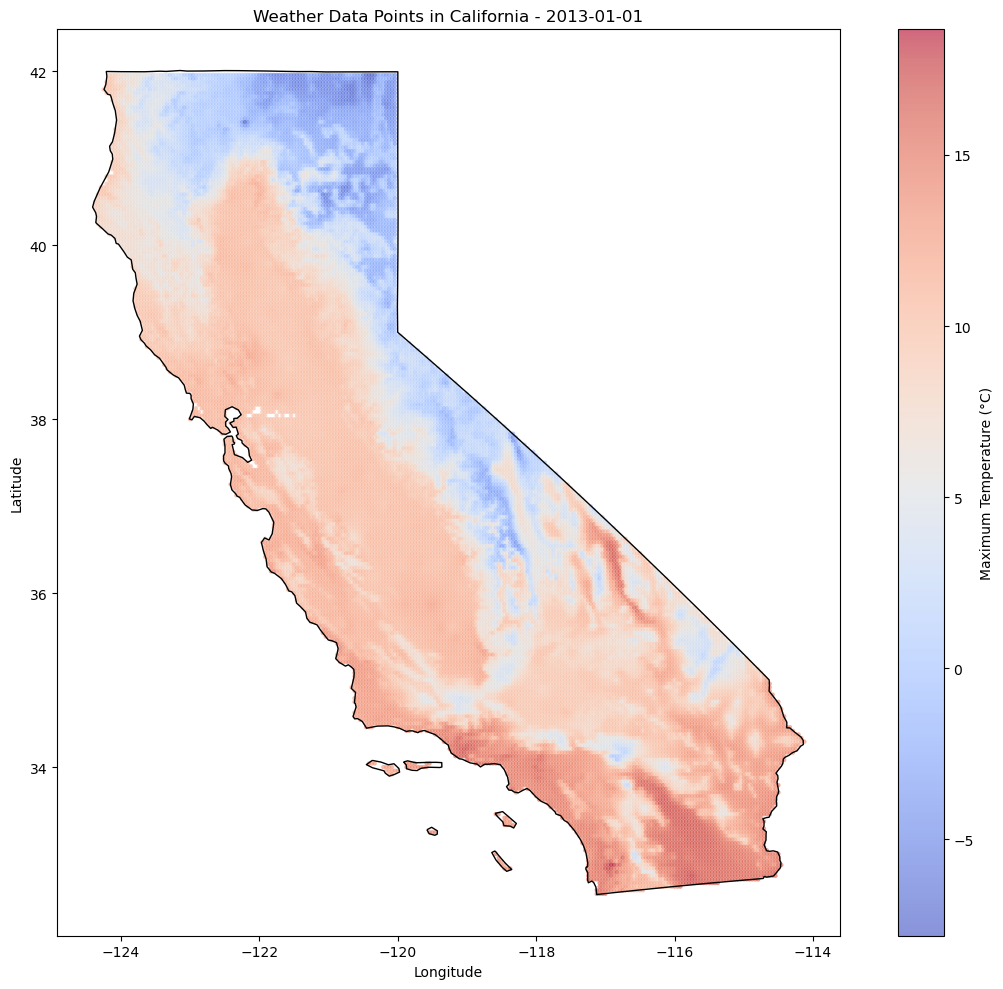

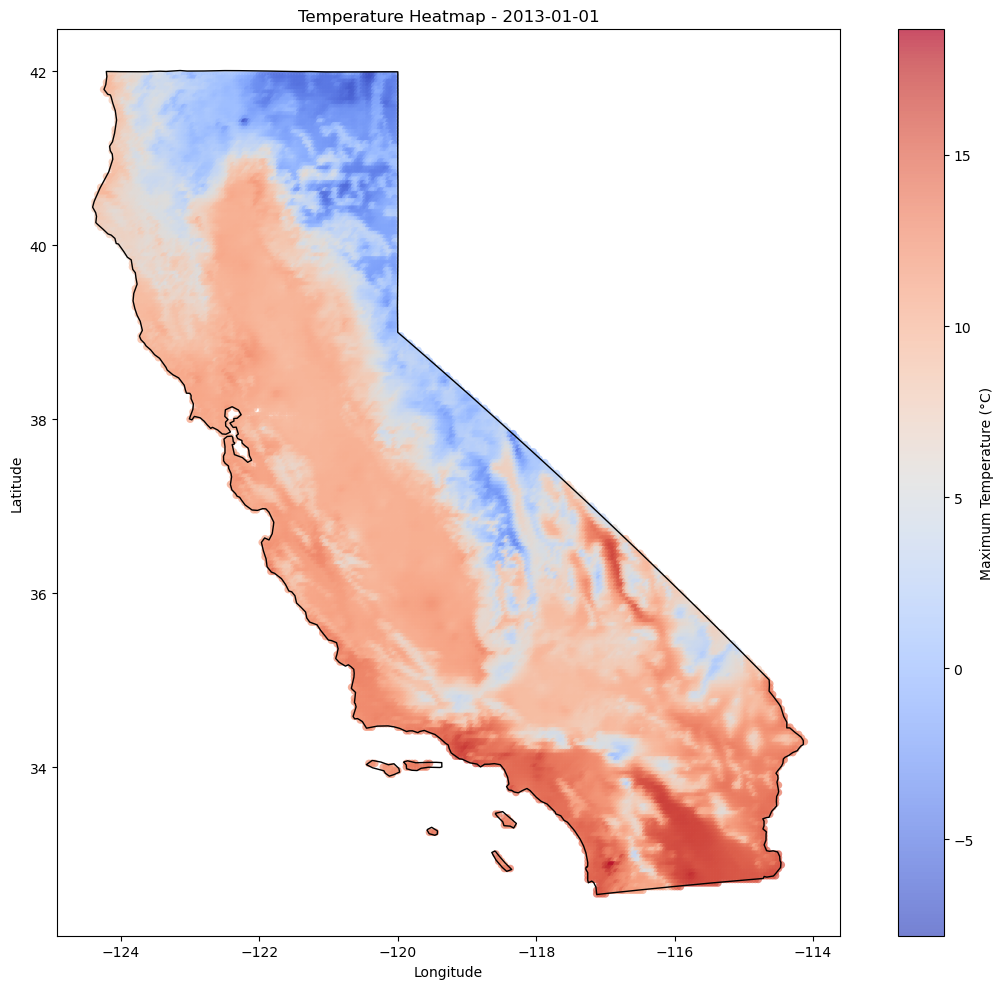

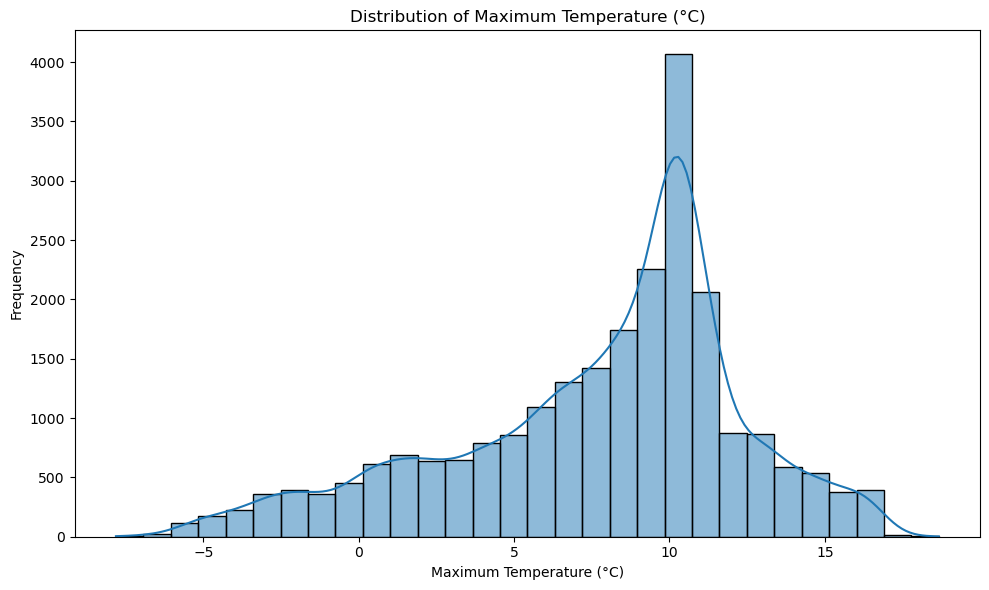

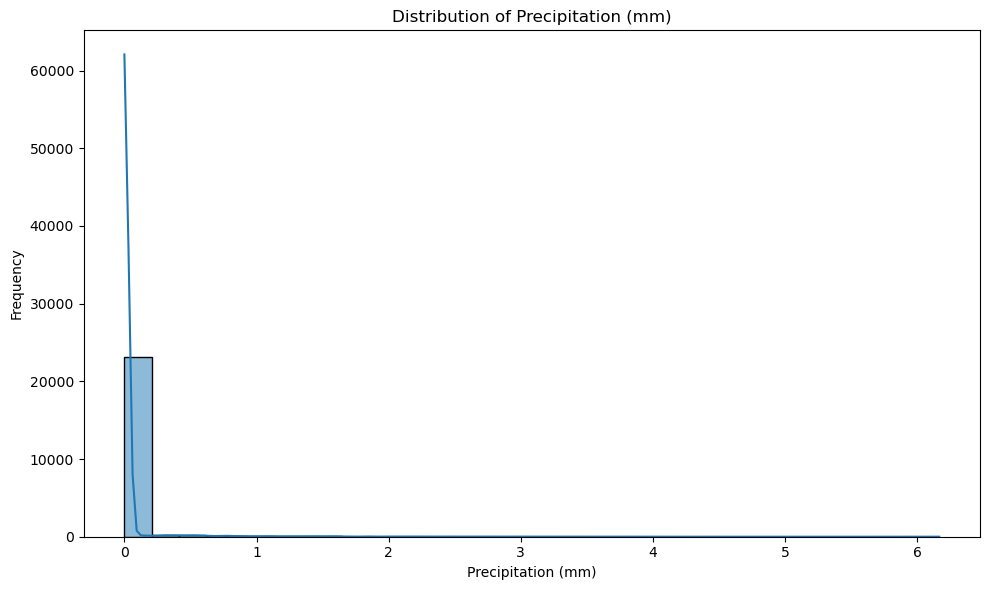

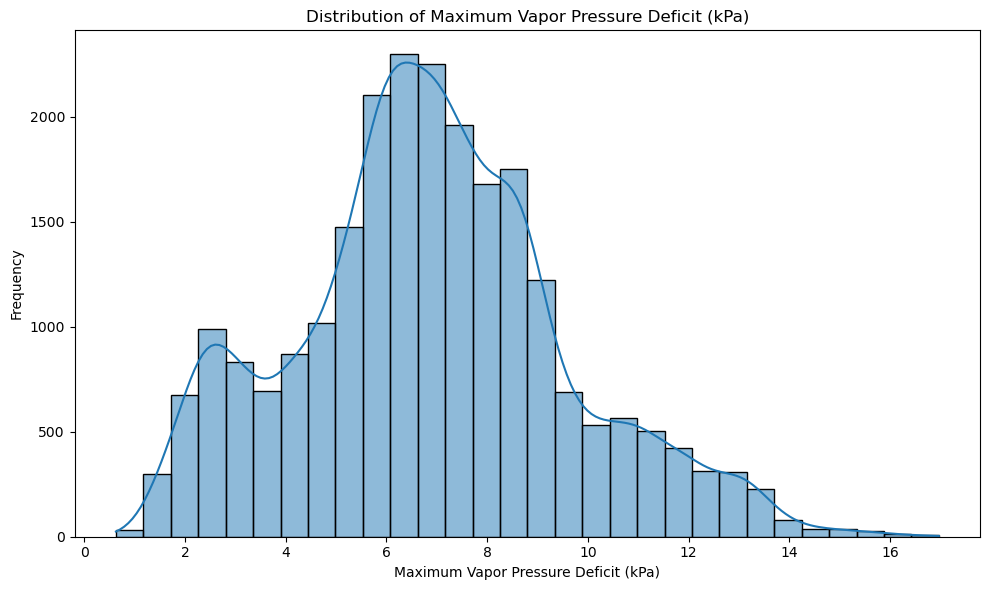

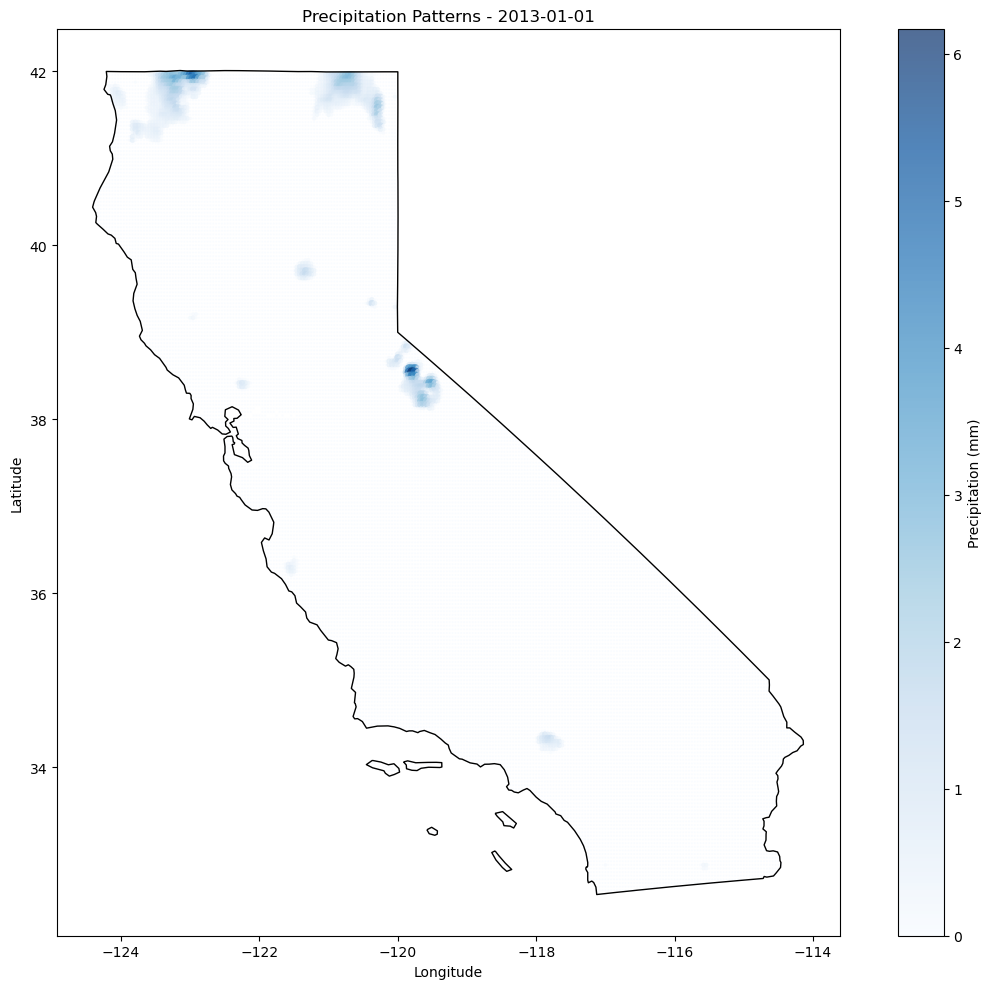

In [3]:
# Use the all-in-one function to explore the winter day data
results = explore_one_day(
    date_str=date_str,
    data_dir=data_dir,
    geojson_path=geojson_path,
    save_dir=save_dir
)

# Extract the data and summary from the results
df = results['data']
summary = results['summary']

# Display additional information about winter conditions
print("\nWinter Weather Conditions:")
print(f"Average maximum temperature: {summary['max_temp_stats']['mean']:.2f}°C")
print(f"Maximum temperature range: {summary['max_temp_stats']['min']:.2f}°C to {summary['max_temp_stats']['max']:.2f}°C")
print(f"Average precipitation: {summary['precipitation_stats']['mean']:.2f}mm")
print(f"Average vapor pressure deficit: {summary['max_vpd_stats']['mean']:.2f}kPa")

## Option 2: Step-by-Step Winter Weather Exploration

Alternatively, we can perform the exploration step by step for more detailed analysis of winter patterns.

### 1. Load the Winter Weather Data

In [ ]:
# Load the weather data for the winter day
df = load_weather_data(date_str, data_dir)

# Display the first few rows of the data
df.head()

### 2. Load California Map

In [ ]:
# Load California map
try:
    california = load_california_map(geojson_path)
    print("California map loaded successfully")
except Exception as e:
    print(f"Warning: Could not load California map: {e}")
    california = None

### 3. Explore Winter Weather Data Summary

Examining key statistics will help us understand the temperature and precipitation patterns on this winter day.

In [ ]:
# Generate summary statistics for the winter weather data
summary = explore_weather_data_summary(df)

### 4. Visualize Winter Temperature Distribution

This will show us the geographic distribution of temperature across California during winter.

In [ ]:
# Plot the distribution of temperature data points on a California map
fig_points, ax_points = plot_point_distribution(df, california)
ax_points.set_title(f'Winter Temperature Distribution in California - {date_str}')
plt.show()

### 5. Visualize Winter Temperature Heatmap

The heatmap will show the more uniform temperature distribution typical during winter in California.

In [ ]:
# Create a winter temperature heatmap over California
fig_temp, ax_temp = plot_temperature_heatmap(df, california)
ax_temp.set_title(f'Winter Temperature Heatmap - {date_str}')
plt.show()

### 6. Explore Winter Weather Variable Distributions

Analyze the distributions of temperature, precipitation, and vapor pressure deficit during winter.

In [ ]:
# Plot winter temperature (tmax) distribution
fig_tmax, ax_tmax = plot_variable_distribution(df, 'tmax')
ax_tmax.set_title(f'Distribution of Maximum Temperature (°C) - Winter Day {date_str}')
plt.show()

In [ ]:
# Plot winter precipitation (ppt) distribution
fig_ppt, ax_ppt = plot_variable_distribution(df, 'ppt')
ax_ppt.set_title(f'Distribution of Precipitation (mm) - Winter Day {date_str}')
plt.show()

In [ ]:
# Plot winter vapor pressure deficit (vbdmax) distribution
fig_vbd, ax_vbd = plot_variable_distribution(df, 'vbdmax')
ax_vbd.set_title(f'Distribution of Vapor Pressure Deficit (kPa) - Winter Day {date_str}')
plt.show()

### 7. Explore Winter Precipitation Patterns

Winter in California typically shows higher precipitation levels compared to summer.

In [ ]:
# Visualize winter precipitation patterns across California
fig_precip, ax_precip = explore_precipitation_patterns(df, california)
ax_precip.set_title(f'Winter Precipitation Patterns - {date_str}')
plt.show()

## Analyzing Vapor Pressure Deficit in Winter

Vapor Pressure Deficit (VPD) is typically lower in winter, which contributes to reduced wildfire risk.

In [ ]:
# Create a VPD visualization for winter
fig, ax = plt.subplots(figsize=(12, 10))

# If California map is available, plot it as background
if california is not None:
    california.boundary.plot(ax=ax, color='black', linewidth=1)

# Create a scatter plot with VPD
scatter = ax.scatter(
    df['longitude'], 
    df['latitude'], 
    c=df['vbdmax'],
    cmap='YlOrRd',
    alpha=0.7,
    s=25,
    edgecolor='none'
)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Maximum Vapor Pressure Deficit (kPa)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Winter Vapor Pressure Deficit - {date_str}')

plt.tight_layout()
plt.show()

## Save Winter Weather Figures

In [ ]:
# Save individual figures for the winter day analysis
fig_points.savefig(os.path.join(save_dir, f"{date_str}_winter_point_distribution.png"))
fig_temp.savefig(os.path.join(save_dir, f"{date_str}_winter_temperature_heatmap.png"))
fig_tmax.savefig(os.path.join(save_dir, f"{date_str}_winter_tmax_distribution.png"))
fig_ppt.savefig(os.path.join(save_dir, f"{date_str}_winter_ppt_distribution.png"))
fig_vbd.savefig(os.path.join(save_dir, f"{date_str}_winter_vbdmax_distribution.png"))
fig_precip.savefig(os.path.join(save_dir, f"{date_str}_winter_precipitation_patterns.png"))

print(f"Winter weather figures saved to: {save_dir}")

## Compare With Other Winter Dates

We can explore different winter days to compare patterns and identify trends.

In [ ]:
# Function to explore different winter days
def explore_different_winter_day(new_date_str):
    print(f"Exploring winter weather data for {new_date_str}")
    
    # Update data directory for the new date
    new_data_dir = project_root / "data" / "raw" / "weather" / new_date_str[:4]
    
    # Use the all-in-one function to explore the data
    results = explore_one_day(
        date_str=new_date_str,
        data_dir=new_data_dir,
        geojson_path=geojson_path,
        save_dir=save_dir
    )
    
    return results

# Example: explore another winter day (December 15, 2013)
# Uncomment the line below to run it
# another_winter_results = explore_different_winter_day("20131215")

## Comparing Winter with Summer Conditions

To understand seasonal differences, we can compare key metrics between winter and summer:

1. **Temperature**: Winter shows lower and more uniform temperatures compared to summer's higher temperatures with greater inland-coastal variation
2. **Precipitation**: Winter typically has higher precipitation, especially in northern California
3. **Vapor Pressure Deficit**: Winter has lower VPD values, reducing vegetation dryness
4. **Wildfire Risk**: These winter conditions generally contribute to lower wildfire risk compared to summer

For a direct comparison, run the summer analysis notebook (`explore_weather_summer_day.ipynb`) and compare the outputs.

## Conclusion

In this notebook, we explored weather data for a specific day in California. We visualized the distribution of weather points on a map, examined temperature and precipitation patterns, and analyzed the distributions of key weather variables.

This analysis provides insights into:
1. The geographic coverage and density of weather data points
2. Temperature patterns across California
3. Precipitation patterns and their spatial distribution
4. Statistical distributions of temperature, precipitation, and vapor pressure deficit

These visualizations can help understand weather conditions that might contribute to wildfire risk on a given day.